In [64]:
import numpy as np
import pandas as pd

In [65]:
data = pd.read_csv("Delivery_details.csv")
data.head()

,FixtureId,InningId,InningNumber,OverNumber,BattingPlayerId,NonStrikeBattingPlayerId,BallNumber,BowlerPlayerId,ShotAngle,ShotMagnitude,...,IsReferred,OutcomeId,ReferralOutcomeId,TeamRuns,RunsByes,RunsConceded,RunsWide,RunsLegByes,FieldingPosition,TotalRuns
0,9606,10546,1,1,374,1156,1,661,90,48,...,0,0,0,0,0,1,1,0,37,68
1,9606,10546,1,1,374,1156,1,661,0,0,...,0,1,0,0,0,0,0,0,0,68
2,9606,10546,1,1,1146,1156,2,661,0,0,...,0,1,0,0,0,0,0,0,0,68
3,9606,10546,1,1,1047,1156,3,661,270,40,...,0,0,0,0,0,0,0,0,3,68
4,9606,10546,1,1,1047,1156,4,661,337,73,...,0,0,0,0,0,0,0,0,4,68


In [66]:
df = pd.DataFrame()
df["InningNumber"] = data["InningNumber"]
df["OverNumber"] = data["OverNumber"]
df["BallNumber"] = data["BallNumber"]
#df["ShotAngle"] = data["ShotAngle"]
#df["ShotMagnitude"] = data["ShotMagnitude"]
df["IsWicket"] = data["IsWicket"]
df["IsWide"] = data["IsWide"]
df["IsNoBall"] = data["IsNoBall"]
df["IsByes"] = data["IsByes"]
df["IsLegByes"] = data["IsLegByes"]
df["IsFreeHit"] = data["IsFreeHit"]
df["IsPowerPlay"] = data["IsPowerPlay"]
df["IsBattingPowerPlay"] = data["IsBattingPowerPlay"]
df["TeamRuns"] = data["TeamRuns"]
df["RunsByes"] = data["RunsByes"]
df["RunsConceded"] = data["RunsConceded"]
df["RunsWide"] = data["RunsWide"]
df["RunsLegByes"] = data["RunsLegByes"]
df["TotalRuns"] = data["TotalRuns"]

df

,InningNumber,OverNumber,BallNumber,IsWicket,IsWide,IsNoBall,IsByes,IsLegByes,IsFreeHit,IsPowerPlay,IsBattingPowerPlay,TeamRuns,RunsByes,RunsConceded,RunsWide,RunsLegByes,TotalRuns
0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,68
1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,68
2,1,1,2,1,0,0,0,0,0,1,0,0,0,0,0,0,68
3,1,1,3,0,0,0,0,0,0,1,0,0,0,0,0,0,68
4,1,1,4,0,0,0,0,0,0,1,0,0,0,0,0,0,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25972,2,19,3,1,0,0,0,0,0,0,0,0,0,0,0,0,166
25973,2,19,4,0,0,0,0,0,0,0,0,0,0,0,0,0,166
25974,2,19,5,0,0,0,0,0,0,0,0,0,0,0,0,0,166
25975,2,19,6,0,0,0,0,0,0,0,0,4,0,4,0,0,166


In [67]:
df.isnull().sum()

InningNumber          0
OverNumber            0
BallNumber            0
IsWicket              0
IsWide                0
IsNoBall              0
IsByes                0
IsLegByes             0
IsFreeHit             0
IsPowerPlay           0
IsBattingPowerPlay    0
TeamRuns              0
RunsByes              0
RunsConceded          0
RunsWide              0
RunsLegByes           0
TotalRuns             0
dtype: int64

In [68]:
i = 1
tot_score = 0
start = 0
while i in range(len(df)):
    if df.iloc[i-1]["InningNumber"]==df.iloc[i]["InningNumber"]:
        tot_score = tot_score + float(df.iloc[i]["RunsConceded"]) + float(df.iloc[i]["RunsByes"]) + float(df.iloc[i]["RunsLegByes"])
    else:
        df.iloc[start:i,len(df.columns)-1] = tot_score        
        start = i
        tot_score = float(df.iloc[i]["RunsConceded"]) + float(df.iloc[i]["RunsByes"]) + float(df.iloc[i]["RunsLegByes"])
    i=i+1

In [69]:
df.head(20)

,InningNumber,OverNumber,BallNumber,IsWicket,IsWide,IsNoBall,IsByes,IsLegByes,IsFreeHit,IsPowerPlay,IsBattingPowerPlay,TeamRuns,RunsByes,RunsConceded,RunsWide,RunsLegByes,TotalRuns
0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,77
1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,77
2,1,1,2,1,0,0,0,0,0,1,0,0,0,0,0,0,77
3,1,1,3,0,0,0,0,0,0,1,0,0,0,0,0,0,77
4,1,1,4,0,0,0,0,0,0,1,0,0,0,0,0,0,77
5,1,1,5,0,0,0,0,0,0,1,0,0,0,0,0,0,77
6,1,1,6,0,1,0,0,0,0,1,0,0,0,1,1,0,77
7,1,1,6,0,0,0,0,0,0,1,0,0,0,0,0,0,77
8,1,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,77
9,1,2,2,0,1,0,0,0,0,1,0,0,0,1,1,0,77


In [70]:
df.shape

(25977, 17)

In [71]:
df.to_csv("UpdateModel.csv",index=None)

In [59]:
#del df["ShotAngle"]
#del df["ShotMagnitude"]
#del df["IsPowerPlay"]
#del df["IsBattingPowerPlay"]

In [72]:
df.head()

,InningNumber,OverNumber,BallNumber,IsWicket,IsWide,IsNoBall,IsByes,IsLegByes,IsFreeHit,IsPowerPlay,IsBattingPowerPlay,TeamRuns,RunsByes,RunsConceded,RunsWide,RunsLegByes,TotalRuns
0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,77
1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,77
2,1,1,2,1,0,0,0,0,0,1,0,0,0,0,0,0,77
3,1,1,3,0,0,0,0,0,0,1,0,0,0,0,0,0,77
4,1,1,4,0,0,0,0,0,0,1,0,0,0,0,0,0,77


In [76]:
X = df.iloc[:,:-1]
x = X.to_numpy()
Y = df.iloc[:,-1]
y = Y.to_numpy()

from sklearn import model_selection
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(x,y,test_size = 0.2)
print(X_train.shape)
print(Y_train.shape)

(20781, 16)
(20781,)


In [77]:
from sklearn.linear_model import LinearRegression
alg = LinearRegression()
alg.fit(X_train,Y_train)

y_p = alg.predict(X_test)
y_pred = y_p.reshape(-1,1)
print(y_pred.shape)
y_test = Y_test.reshape(-1,1)
print(y_test.shape)
print(alg.score(X_test,y_test))
print(alg.score(X_train,Y_train))

(5196, 1)
(5196, 1)
0.08025767083774404
0.08341984149299686


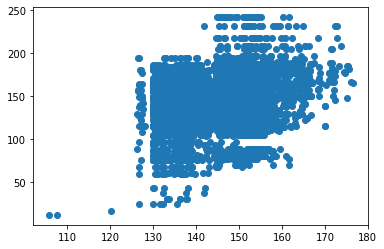

In [78]:
import matplotlib.pyplot as plt
plt.scatter(y_pred,y_test)